<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_six/Neural_Network_Psuedo_inverse_Condition_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

(ds_train, ds_validation), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteC2YKCV/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


NameError: name 'plt' is not defined

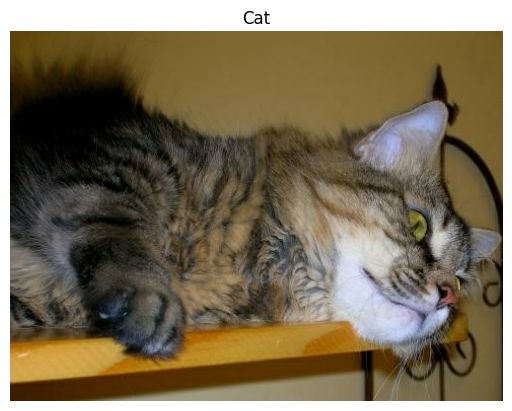

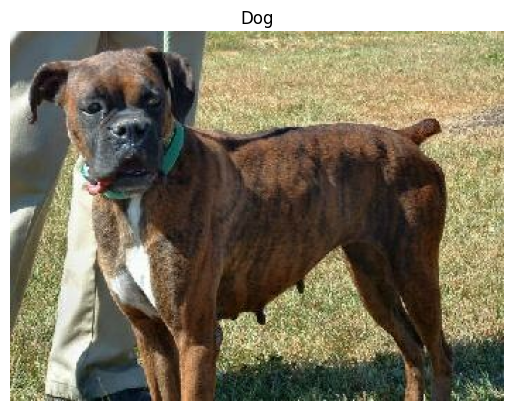

In [5]:
def plot_image(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title("Cat" if label == 0 else "Dog")
    plt.axis('off')
    plt.show()

# Extracting one cat and one dog image
cat_image, dog_image = None, None
for image, label in ds_train:
    if label == 0 and cat_image is None:
        cat_image = image
    elif label == 1 and dog_image is None:
        dog_image = image
    if cat_image is not None and dog_image is not None:
        break

# Display the images
plot_image(cat_image, 0)  # Cat image
plot_image(dog_image, 1)  # Dog image

In [6]:
# This function will convert images to a flat array
def reshape_image(image, label):
    flattened_image = tf.reshape(image, [-1])  # Flatten the image
    return flattened_image, label

# Determine the shape of one image
for example in ds_train.take(1):
    image, label = example
    image_shape = image.shape
    print("Original Image Shape:", image_shape)

# Reshape the images in the dataset
ds_train = ds_train.map(reshape_image)
ds_validation = ds_validation.map(reshape_image)

# Checking the reshaped image
for example in ds_train.take(1):
    reshaped_image, label = example
    print("Reshaped Image Shape:", reshaped_image.shape)


Original Image Shape: (262, 350, 3)
Reshaped Image Shape: (275100,)


In [11]:
# import numpy as np
# import tensorflow as tf
# import tensorflow_datasets as tfds
# from sklearn.linear_model import Lasso
# import matplotlib.pyplot as plt

# # Loading and processing the dataset
# def preprocess(image, label):
#     image = tf.cast(image, tf.float32) / 255.0  # Normalize images
#     image = tf.image.resize(image, [32, 32])    # Resize images
#     return tf.reshape(image, [-1]), label

# # Load dataset
# (ds_train, ds_test), ds_info = tfds.load(
#     'cats_vs_dogs',
#     split=['train[:80%]', 'train[80%:]'],
#     as_supervised=True,
#     with_info=True
# )

# # Preprocess dataset
# ds_train = ds_train.map(preprocess)
# ds_test = ds_test.map(preprocess)

# # Convert to numpy arrays for easier manipulation
# train_images, train_labels = np.array([i[0].numpy() for i in ds_train]), np.array([i[1].numpy() for i in ds_train])
# test_images, test_labels = np.array([i[0].numpy() for i in ds_test]), np.array([i[1].numpy() for i in ds_test])

# # Creating labels (1 for dogs, -1 for cats)
# train_labels = np.where(train_labels == 1, 1, -1)
# test_labels = np.where(test_labels == 1, 1, -1)

# train_labels = train_labels.reshape(-1, 1)

# Pseudo-inverse classification
A = np.dot(train_labels, np.linalg.pinv(train_images.T))
predicted_labels = np.sign(np.dot(A, test_images.T))

# Visualization (Similar to MATLAB subplot)
plt.subplot(4, 1, 1)
plt.bar(range(len(predicted_labels)), predicted_labels, color=[.6, .6, .6], edgecolor='k')
plt.axis('off')

plt.subplot(4, 1, 2)
plt.bar(range(len(A)), A, color=[.6, .6, .6], edgecolor='k')
plt.axis('off')

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(train_images, train_labels)
A_lasso = lasso.coef_

predicted_labels_lasso = np.sign(np.dot(A_lasso, test_images.T))

plt.figure(2)
plt.subplot(2, 2, 1)
A_lasso_reshaped = np.flipud(A_lasso.reshape(32, 32))
plt.pcolor(A_lasso_reshaped, cmap='gray')
plt.axis('off')

plt.figure(1)
plt.subplot(4, 1, 3)
plt.bar(range(len(predicted_labels_lasso)), predicted_labels_lasso, color=[.6, .6, .6], edgecolor='k')
plt.axis('off')

plt.subplot(4, 1, 4)
plt.bar(range(len(A_lasso)), A_lasso, color=[.6, .6, .6], edgecolor='k')
plt.axis('off')

plt.figure(2)
plt.subplot(2, 2, 2)
plt.pcolor(A_lasso_reshaped, cmap='gray')
plt.axis('off')

plt.show()

ValueError: shapes (18610,1) and (18610,3072) not aligned: 1 (dim 1) != 18610 (dim 0)